# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## 1. Is the distribution of body temperatures normal?
Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test

In [4]:
import matplotlib.pyplot as plt

(array([ 4.,  6., 15., 26., 30., 30., 15.,  1.,  2.,  1.]),
 array([ 96.3 ,  96.75,  97.2 ,  97.65,  98.1 ,  98.55,  99.  ,  99.45,
         99.9 , 100.35, 100.8 ]),
 <a list of 1 Patch objects>)

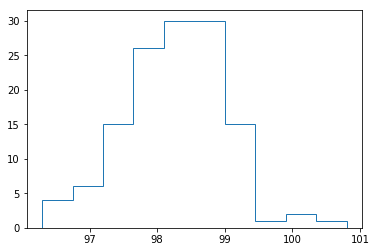

In [5]:
# Make a histogram of the temperature data
plt.hist(df['temperature'], bins=10, histtype='step')

A histogram of the temperature data can show if the distribution looks like a normal distribution. The temperature data here has a peak but the tails are not perfectly symmetric.

In [6]:
import numpy as np
import seaborn as sns

In [7]:
sample_mean = np.mean(df['temperature'])
sample_std = np.std(df['temperature'])

In [8]:
samples = np.random.normal(sample_mean, sample_std, size=1000)

In [9]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [10]:
x, y = ecdf(df['temperature']) 
x_theor, y_theor = ecdf(samples) 

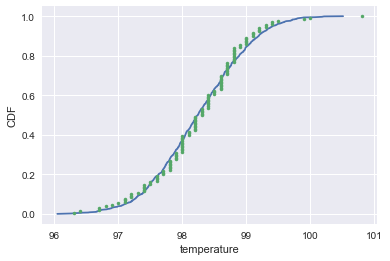

In [11]:
sns.set()
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('temperature')
plt.ylabel('CDF')
plt.show()

The theoretical CDF and the ECDF of the data suggest that the body temperatures are, indeed, Normally distributed. 

## 2. Is the sample size large? Are the observations independent?
Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

In [12]:
len(df['temperature'])

130

The Central Limit Theorem states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution. This fact holds especially true for sample sizes over 30. The sample size is 130 here, large enough for the CLT to apply. 


The observations are independent because the occurance of one event, the body temperature of one person, has no influence on the body temperature of the next event, that is the body temperature of the next person.

## 3. Is the true population mean really 98.6 degrees F?
First, try a bootstrap hypothesis test.
Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  tt  or  zz  statistic?
Now try using the other test. How is the result be different? Why?

In [13]:
# Bootstrap Test:
# Translate all of the data such that the mean is 98.6 degrees F by adding the new mean 98.6 and subtracting the mean 
# of the original data set.
# Set the significance level alpha = 0.05
temp = np.array(df['temperature'])
temp_mean = np.mean(temp)
empirical = 98.6
new_sample = temp + empirical - temp_mean

bs_mean = np.empty(10000)
for i in range(10000): 
    bs_sample = np.random.choice(new_sample, size=len(temp))
    bs_mean[i] = np.mean(bs_sample)
    
p = np.sum(bs_mean <= temp_mean) / 10000
print('p-value is ', p)

p-value is  0.0


#### So the bootstrap hypothesis test with a low p-value suggests that the null hypothesis "the true mean of this body temperature sample is 98.6" is false.

I will use a one-sample test to test the hypothesis if the true mean of this body temperature sample is really 98.6 degrees F. Because we don't have a distribution of the population and we are comparing a sample mean to another number. 
In this situation, it is appropriate to use the t statistic, because we don't know the standard deviation of the population. If the population standard deviation is known, it is more appropriate to use z statistic also because the sample size is bigger than 30. 


In [14]:
#The sample mean(x̄)
print ('The sample mean is', temp_mean)
#The population mean(μ) 
print ('The population mean is', empirical)
#The sample standard deviation(s)
print ('The sample deviation is', np.std(temp))
# Number of observations(n)
print ('The number of observation is', len(temp))

The sample mean is 98.24923076923075
The population mean is 98.6
The sample deviation is 0.730357778905038
The number of observation is 130


In [15]:
#Calculate the t-score by using the formula t=(x̄-μ)/(s/sqrt(n))
t = (temp_mean-empirical)/(np.std(temp)/np.sqrt(len(temp)))
print ('t-statistic is', t )

t-statistic is -5.4759252020785585


In [16]:
#The alpha level
alpha = 0.05
print('The significance leve is', alpha)
#The degrees of freedom
dof = len(temp) -1
print('The degree of freedom is', dof)

The significance leve is 0.05
The degree of freedom is 129


In [17]:
from scipy import stats

In [18]:
#Two sided p-value
pval = stats.t.sf(np.abs(t), dof)*2
print('The p-value is', pval)

The p-value is 2.1887464624050777e-07


#### The p-value so low that is is close to zero, the same as what we got from the bootstrap hypothesis testing.

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?

What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

#### t-statistic is still the correct one to use, because 1) the sample size is smaller than 30, 2) the population standard deviation is unknown.

In [19]:
# draw a sample of size 10 from the data
sample = np.random.choice(temp, size=10)

In [20]:
# t-test
#The sample mean(x̄)
mean = np.mean(sample)
print ('The sample mean is', mean)
#The population mean(μ) 
print ('The population mean is', empirical)
#The sample standard deviation(s)
std = np.std(sample)
print ('The sample deviation is', np.std(sample))
# Number of observations(n)
n = 10
print ('The number of observation is', n)

The sample mean is 98.49
The population mean is 98.6
The sample deviation is 0.7217340230306448
The number of observation is 10


In [21]:
#Calculate the t-score by using the formula t=(x̄-μ)/(s/sqrt(n))
tt = (mean-empirical)/(std/np.sqrt(n))
print ('t-statistic is', tt )
#The alpha level
alpha1 = 0.05
print('The significance leve is', alpha1)
#The degrees of freedom
dof1 = n -1
print('The degree of freedom is', dof1)
#Two sided p-value
pval1 = stats.t.sf(np.abs(tt), dof1)*2
print('The p-value for the t-test is', pval1)

t-statistic is -0.48196500583117197
The significance leve is 0.05
The degree of freedom is 9
The p-value for the t-test is 0.6413348192776738


In [22]:
# z-test  z = (X-μ)/σ, since population standard deviation is unknown, the original sample standard deviation is used.
zz = (mean-empirical)/np.std(temp)
print('z-statistic is', zz)

z-statistic is -0.15061111578069708


In [23]:
pval2 = stats.norm.sf(abs(zz))*2
print('The p-value for the z-test is', pval2)

The p-value for the z-test is 0.8802824922987803


#### The high p-values for both tests suggest that this sample of size 10 does not have a significant different mean from the population mean. Compared to the results for the larger sample hypothesis test, the higher p-value for the z-statistic suggests that the z-test is a worse method to test the hypothesis. 

### 5. At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.

Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [38]:
# Use the bootstrap approach
# Translate all of the data such that the mean is 98.6 degrees F by adding the new mean 98.6 and subtracting the mean 
# of the original data set. Set the significance level alpha = 0.05
new_sample1 = temp + empirical - np.mean(temp)
# one draw bootstrap sampling
bs_sample1 = np.empty(10000)
for i in range(10000):
    bs_sample1[i] = np.mean(np.random.choice(new_sample1, size=len(temp)))

In [39]:
# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_sample1, [2.5, 97.5])
print('The 95% confidence interval is', conf_int)

The 95% confidence interval is [98.47461538 98.73153846]


Since the bootstrap distribution is approximately Normal (see question 2), 95% of the bootstrap statistics are within 2 SE of the boostrap center (i.e., original sample stat.). That is, 95% of bootstrap statistics are within the 95% CI. So the margin of error is 95%.

In [35]:
# Use the frequentist approach
# For a 95% confidence interval
# Calculate the margin of error
me = np.abs(1.96 * np.std(temp)/np.sqrt(len(temp)) )
print('The margin of error is', me)
print('The 95% confidence interval is [', 98.6-me, 98.6+me, ']')

The margin of error is 0.12555096480257902
The 95% confidence interval is [ 98.47444903519741 98.72555096480258 ]


#### The 95% confidence interval using the bootstraping and frequentist approach are the same. 

### 6. Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?

Write a story with your conclusion in the context of the original problem.

I am going to use the bootstrap resampling to test the hypothesis that that this no significant difference between males and females in normal temperature.

In [28]:
male = np.array(df[df['gender'] == 'M']['temperature'])
female = np.array(df[df['gender'] == 'F']['temperature'])

In [29]:
print('The average male body temperature in this sample is', np.mean(male))
print('The average female body temperature in this sample is',np.mean(female))

The average male body temperature in this sample is 98.10461538461537
The average female body temperature in this sample is 98.39384615384614


In [37]:
# Bootstrap resampling method
# Compute mean of all data: temp_mean

# Generate shifted arrays, assuming there is no difference between male and female.
male_shifted = male - np.mean(male) + temp_mean
female_shifted = female - np.mean(female) + temp_mean

# Compute 1,000 bootstrap replicates from shifted arrays
bs_mean_m = np.empty(1000)
bs_mean_f = np.empty(1000)
for i in range(1000): 
    bs_sample_m = np.random.choice(male_shifted, size=len(male))
    bs_sample_f = np.random.choice(female_shifted, size=len(female))
    bs_mean_m[i] = np.mean(bs_sample_m)
    bs_mean_f[i] = np.mean(bs_sample_f)

# Get replicates of difference of means: bs_replicates
bs_diff = bs_mean_f - bs_mean_m

# Compute and print p-value: p
p = np.sum(bs_diff>(np.mean(female)-np.mean(male)))/ len(bs_diff)
print('p-value =', p)

p-value = 0.007


#### The bootstrap resampling approach suggest the null hypothesis is false and there is significant difference between male and female in body temperature.